In [68]:
import pandas as pd
import numpy as np
import ast

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [69]:
df3 = pd.read_csv('/content/drive/MyDrive/edx_courses2.csv')

df3.head()

,title,summary,cantidad_alumnos,course_type,institution,instructors,Level,subject,language,subtitles,horas_x_semana,duracion_x_semana,price,course_description,course_syllabus,course_url,sales,date_curso,rating
0,How to Learn Online,Learn essential strategies for successful onli...,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2.5,2,49.0,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online,6124020.0,2017-06-18,3
1,Leading High-Performing Teams,"Learn how to motivate, engage and empower peop...",32847,Self-paced on your time,The University of Queensland,Tyler G. Okimoto,Intermediate,Communication,English,English,9.0,10,5.0,This course will blend business theory and rea...,MODULE 1: INTRODUCTION TO TEAMS\nFocuses on re...,https://www.edx.org/course/leading-high-perfor...,164235.0,2019-11-02,1
2,"Managing Study, Stress and Mental Health at Un...",Develop a clearer understanding of what mental...,23061,Self-paced on your time,Curtin University,Ben Milbourn-Craig Thompson-Sonya Girdler-Fran...,Introductory,Health & Safety,English,English,2.0,2,49.0,This short course is a German-Australian colla...,Module 1: Mental fitnessBy the end of this mod...,https://www.edx.org/course/managing-study-stre...,1129989.0,2020-09-29,1
3,Six Sigma: Define and Measure,An introduction to the Six Sigma methodology a...,92411,Self-paced on your time,Technische Universität München,Martin Grunow-Holly Ott,Introductory,Business & Management,English,English,3.5,8,99.0,Understand the background and meaning of Six S...,Week 1: Six Sigma Introduction\nIntroduction t...,https://www.edx.org/course/six-sigma-define-an...,9148689.0,2020-09-09,3
4,Fat Chance: Probability from the Ground Up,Increase your quantitative reasoning skills th...,66835,Self-paced on your time,Harvard University,Benedict Gross-Joseph Harris-Emily Riehl,Introductory,Math,English,English,4.0,7,49.0,Created specifically for those who are new to ...,1 Basic Counting2 Advanced Counting3 Basic Pro...,https://www.edx.org/course/fat-chance-probabil...,3274915.0,2019-04-28,3


In [70]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               358 non-null    object 
 1   summary             358 non-null    object 
 2   cantidad_alumnos    358 non-null    int64  
 3   course_type         358 non-null    object 
 4   institution         358 non-null    object 
 5   instructors         358 non-null    object 
 6   Level               358 non-null    object 
 7   subject             358 non-null    object 
 8   language            358 non-null    object 
 9   subtitles           358 non-null    object 
 10  horas_x_semana      358 non-null    float64
 11  duracion_x_semana   358 non-null    int64  
 12  price               358 non-null    float64
 13  course_description  358 non-null    object 
 14  course_syllabus     358 non-null    object 
 15  course_url          358 non-null    object 
 16  sales   

# La matriz de correlación que muestras indica las correlaciones entre las variables en el DataFrame df3. Los valores de la matriz varían entre -1 y 1, donde 1 representa una correlación positiva perfecta, -1 representa una correlación negativa perfecta y 0 representa una falta de correlación.

Algunas observaciones basadas en los valores de la matriz de correlación:

La columna 'cantidad_alumnos' tiene una alta correlación positiva (0.88) con la columna 'sales', lo que indica que a medida que aumenta la cantidad de alumnos, también aumentan las ventas.
La columna 'horas_x_semana' tiene una correlación moderada (0.31) con la columna 'price', lo que sugiere que puede haber una relación entre la cantidad de horas dedicadas por semana y el precio del curso.
La columna 'price' tiene una correlación moderada (0.39) con la columna 'sales', lo que indica que a medida que aumenta el precio, también aumentan las ventas en cierta medida.
La columna 'rating' tiene una correlación baja (0.13) tanto con 'sales' como con las otras variables, lo que sugiere que el rating no está fuertemente relacionado con las ventas u otras variables.
Recuerda que la correlación no implica causalidad, es decir, no podemos concluir que un cambio en una variable causa directamente un cambio en otra. Es importante considerar otros factores y realizar un análisis más detallado para comprender mejor las relaciones entre las variables.

In [71]:
correlation_matrix = df3.corr()
print(correlation_matrix)

                   cantidad_alumnos  horas_x_semana  duracion_x_semana  \
cantidad_alumnos           1.000000        0.114533           0.145256   
horas_x_semana             0.114533        1.000000           0.269513   
duracion_x_semana          0.145256        0.269513           1.000000   
price                      0.107943        0.312094           0.186901   
sales                      0.880075        0.202065           0.197078   
rating                     0.080960        0.031787           0.012618   

                      price     sales    rating  
cantidad_alumnos   0.107943  0.880075  0.080960  
horas_x_semana     0.312094  0.202065  0.031787  
duracion_x_semana  0.186901  0.197078  0.012618  
price              1.000000  0.387786  0.054799  
sales              0.387786  1.000000  0.130363  
rating             0.054799  0.130363  1.000000  


<ipython-input-71-5641f02dc554>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df3.corr()


<ipython-input-72-5b27e282dca8>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df3.corr()


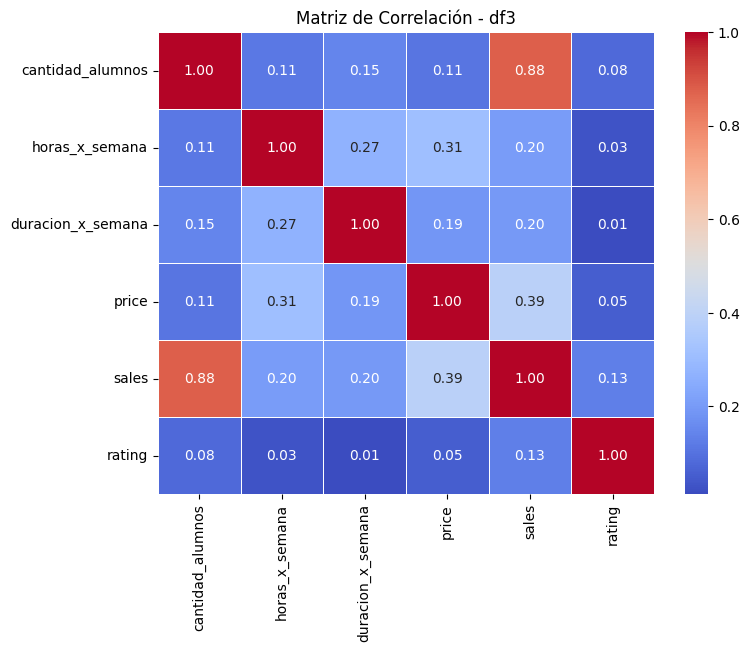

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = df3.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación - df3')
plt.show()

# Segmentación por precio:

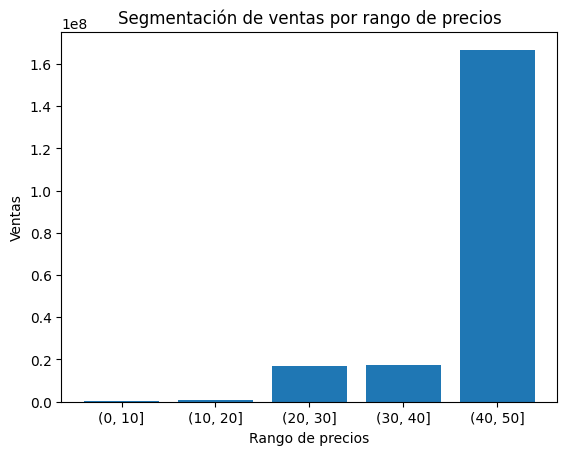

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Definir los rangos de precios
price_ranges = [0, 10, 20, 30, 40, 50]

# Crear una nueva columna para el rango de precios
df3['price_range'] = pd.cut(df3['price'], bins=price_ranges)

# Agrupar los cursos por rango de precios y calcular la suma de las ventas en cada grupo
price_sales = df3.groupby('price_range')['sales'].sum()

# Visualizar los resultados
plt.bar(price_sales.index.astype(str), price_sales)
plt.xlabel('Rango de precios')
plt.ylabel('Ventas')
plt.title('Segmentación de ventas por rango de precios')
plt.show()

# Se nos solicita un Word Cloud de las palabras clave que más se repiten dentro del título -se pueden añadir otras variables de nuestro interés-.

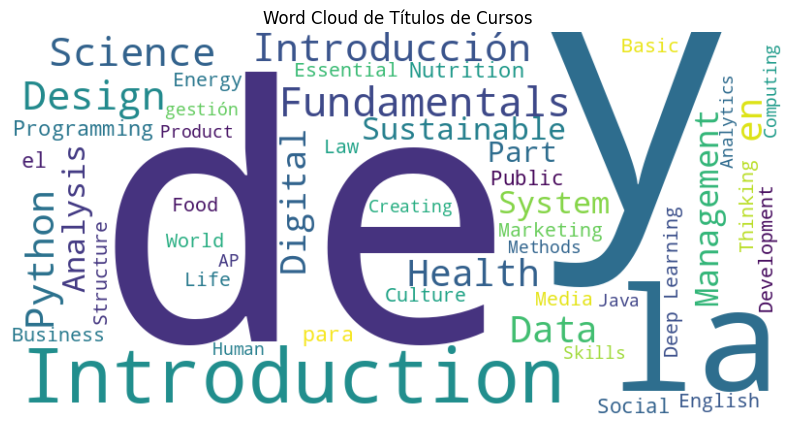

In [75]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = ' '.join(df3['title'])
wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de Títulos de Cursos')
plt.show()